<a href="https://colab.research.google.com/github/maielhadad99/DT_Ensemble_Project/blob/main/DT_and_Ensemble_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [5]:
data = pd.read_csv("/content/drive/MyDrive/talking_data.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Showing overview of the dataset
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [8]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [9]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [10]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [11]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [12]:
data.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [13]:
data.click_time.unique()

array(['2017-11-07 09:30:38', '2017-11-07 13:40:27',
       '2017-11-07 18:05:24', ..., '2017-11-09 04:21:28',
       '2017-11-07 09:33:14', '2017-11-09 13:25:41'], dtype=object)

In [14]:
from datetime import datetime
data.click_time=pd.to_datetime(data.click_time)

In [15]:
data['Month']=pd.DatetimeIndex(data['click_time']).month
data['day_of_year']=pd.DatetimeIndex(data['click_time']).dayofyear
data['day_of_week']=pd.DatetimeIndex(data['click_time']).dayofweek
data['Hour']=pd.DatetimeIndex(data['click_time']).hour

In [16]:
data['attributed_time']=data["attributed_time"].fillna(0)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,Month,day_of_year,day_of_week,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,0,11,311,1,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,0,11,311,1,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,0,11,311,1,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,0,11,311,1,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,0,11,313,3,9


In [17]:
data=data.drop(['click_time','attributed_time'],axis=1)
data.head()

,ip,app,device,os,channel,is_attributed,Month,day_of_year,day_of_week,Hour
0,87540,12,1,13,497,0,11,311,1,9
1,105560,25,1,17,259,0,11,311,1,13
2,101424,12,1,19,212,0,11,311,1,18
3,94584,13,1,13,477,0,11,311,1,4
4,68413,12,1,1,178,0,11,313,3,9


In [18]:
data.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
Month            int64
day_of_year      int64
day_of_week      int64
Hour             int64
dtype: object

In [19]:
data.is_attributed.unique()

array([0, 1])

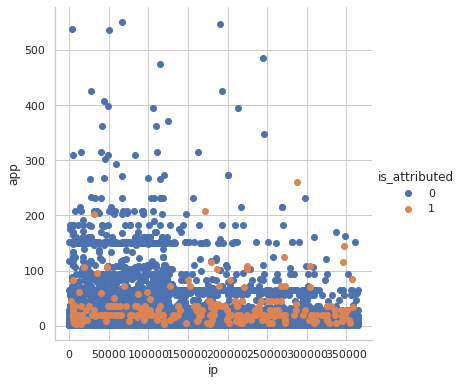

In [20]:
# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="is_attributed", size=5.5) \
   .map(plt.scatter, "ip", "app") \
   .add_legend();
plt.show();


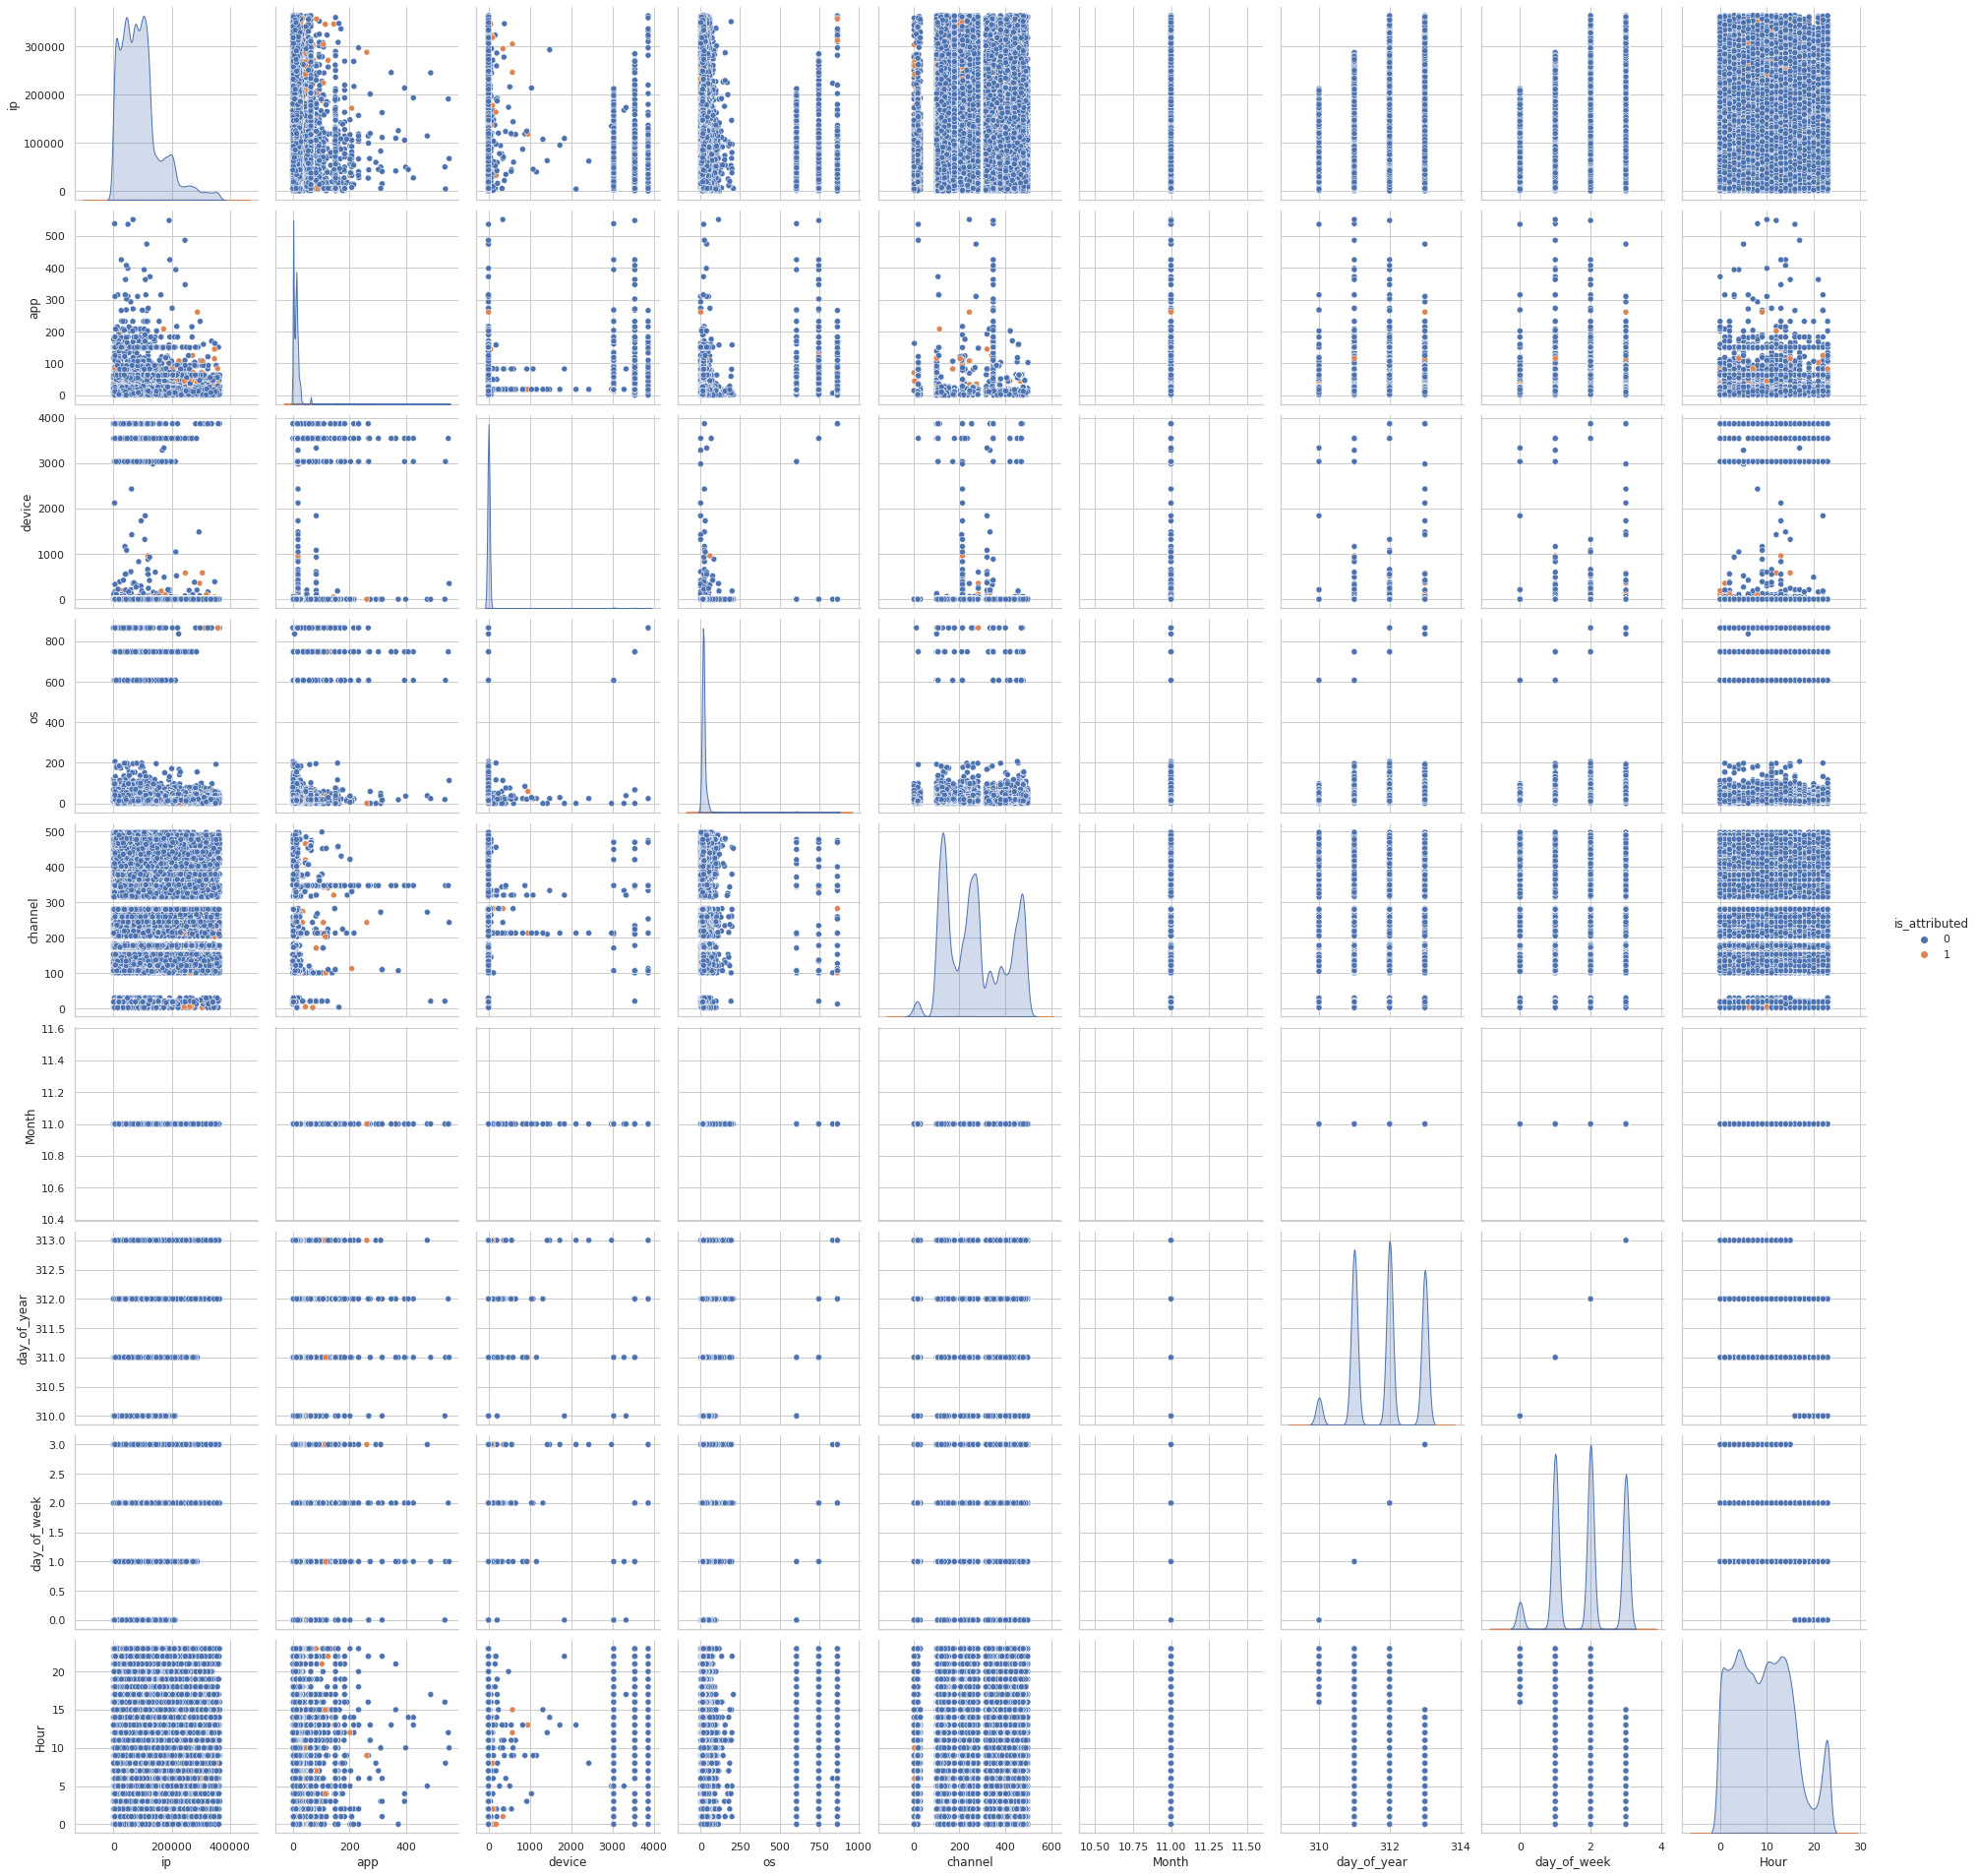

In [21]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="is_attributed", size=3);
plt.show()

In [22]:
data.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
Month            int64
day_of_year      int64
day_of_week      int64
Hour             int64
dtype: object

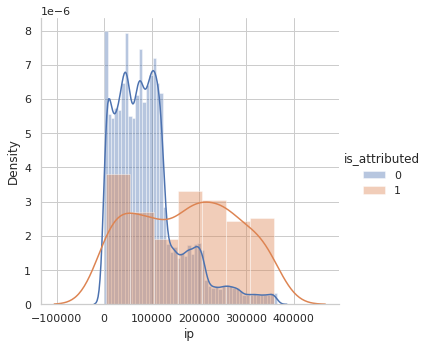

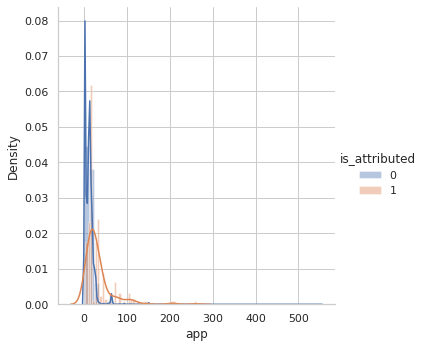

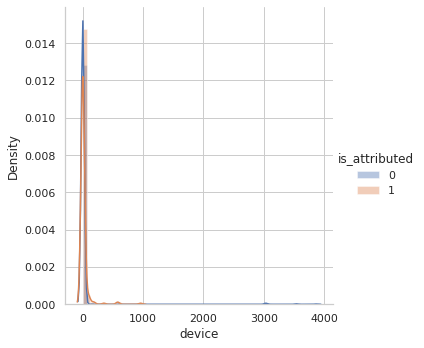

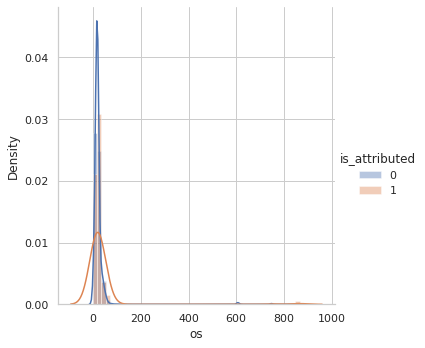

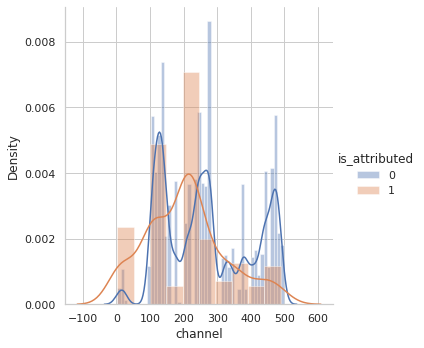

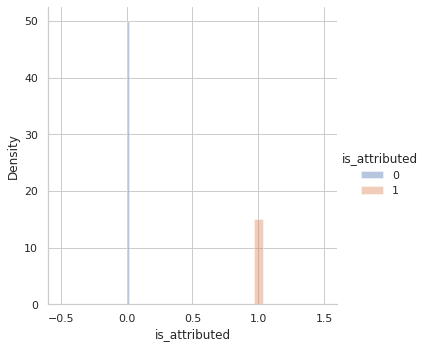

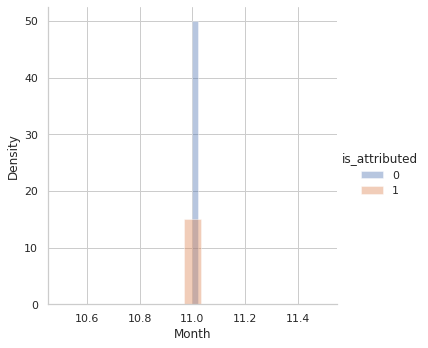

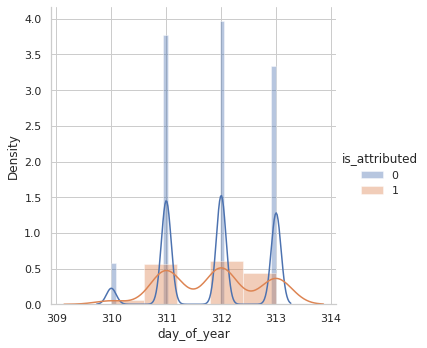

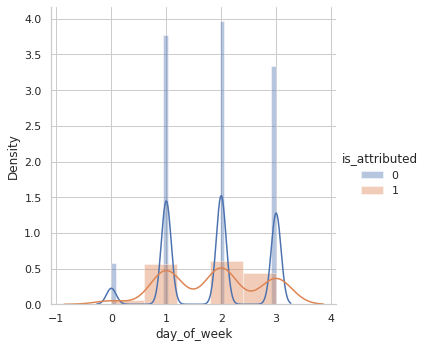

In [23]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="is_attributed", size=5).map(sns.distplot, name).add_legend()
plt.show()

Modelling

In [24]:
X=data.drop(['is_attributed'],axis=1)
y=data["is_attributed"]


In [25]:
# Training and testing the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=8)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((80000, 9), (20000, 9), (80000,), (20000,))

In [26]:
#importing libraries of models
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [27]:
#fitting in model
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [28]:
#predicted output
pred1 = model.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
#accuracy
from sklearn.metrics import accuracy_score

print('The accuracy of the Xgboost is {}%'.format(round(accuracy_score(pred1,y_test)*100,2)))

The accuracy of the Xgboost is 99.81%


In [30]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19958
           1       0.83      0.12      0.21        42

    accuracy                           1.00     20000
   macro avg       0.92      0.56      0.60     20000
weighted avg       1.00      1.00      1.00     20000



In [31]:
pred1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
#Applying AUC/ROC hyperparameters
auc=metrics.roc_auc_score(y_test,pred1)
print('AUC = {} %'.format(auc*100))

AUC = 55.94987569133275 %
